In [47]:
import dask.dataframe as dd
from typing import Tuple
df = dd.read_csv('Youtube0*.csv')

def get_lazy_shape(datf: dd) -> Tuple[int, int]: 
    return (df.shape[0].compute(), df.shape[1])

print(get_lazy_shape(df))
df.head()

(1956, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [55]:
#df["check" in df.CONTENT.compute().str.lower()].shape

def get_check(datf: dd, membership: int) -> int: 
    assert membership in [0,1]
    xs = ["check" in x for x in df.CONTENT.compute().str.lower()]
    ys =  [x==membership for x in df.CLASS.compute()]
    return sum([x and y for x,y in zip(xs,ys)])

def reporter(datf: dd) -> str: 
    c = datf.CLASS.value_counts().compute()
    checkyes = get_check(datf, 1)
    checkno = get_check(datf, 0)
    s0 = f"The number of spam comments is {c.loc[1]}. \n"
    s1 = f"The number of non-spam comments is {c.loc[0]}. \n"
    s2 = "If the heuristic on the word check was the ONLY aspect of the model; \n"
    s3 = f"\twe'd have {c.loc[1] - checkyes} false negatives, \n"
    s4 = f"\tand {c.loc[0] - checkno} false positives. "
    
    return ''.join([s0, s1, s2, s3, s4])

print(reporter(df))

The number of spam comments is 1005. 
The number of non-spam comments is 951. 
If the heuristic on the word check was the ONLY aspect of the model; 
	we'd have 544 false negatives, 
	and 932 false positives. 


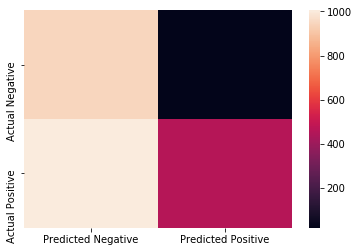

In [61]:
from typing import List
import numpy as np
import pandas as pd
from seaborn import heatmap

def confusionmatrix(datf: dd) -> dd:
    '''a confusion matrix for the baseline model that ONLY considers the heuristic with the word 'check' '''
    seconds = ['Negative', 'Positive']
    firsts = ['Actual', 'Predicted']
    
    def tupdex(first: str) -> List[str]: 
        return [first + ' ' + seconds[0], first + ' ' + seconds[1]]
  
    c = np.empty((2,2))
  
    spam = datf.CLASS.value_counts().compute()

    c[0][0] = spam.loc[0]
    c[1][0] = spam.loc[1]
    
    c[0][1] = get_check(datf, 0)
    c[1][1] = get_check(datf, 1)

    return pd.DataFrame(c, 
                        index=tupdex(firsts[0]), 
                        columns=tupdex(firsts[1])
                       ).astype(int)
    

heatmap(confusionmatrix(df));

In [ ]:
# part2

# Databricks                                                                                                                       

Databricks seems well-suited to **prototyping and sketching a distributed computing strategy**. It gives me a low-pressure environment to get comfortable with dispatching jobs to clusters with spark, simply by *simulating* a distributed environment in a free-to-play service. For example, if I'm starting a brand new ETL pipeline that will ultimately perform well when dumped in the order of 10e40 rows and 10e60 features, I'd want to start in Databricks' free-to-use mode to make sure I get my tools playing nicely with my samples.
 
# deploying
 
Once my team is *oriented to the problem* and have reasonably well-iterated ETL code, we'd port it to whichever cloud service has the best prices at the time, provided all else equal with smooth notebook environments and library compatibility. Here we might end up on AWS, Azure, or even Databricks' paid service.
 
# orders of magnitude 
 
### small data: 
If the data dump is within the order of maybe 10e9 observations and 10e6 features, I'd handle it on a personal computer. I may be required to sample down a few orders during notebook work sessions, and I'd have to be very clever sometimes, but it'd be completely doable.
 
### medium data: 
For a data dump in the order of 10e10-10e20 observations and 10e7-10-12 features, I think it'd be fun to make my own personal cloud by asking family and friends if I can run docker packages on their computers! In a professional environment, this could mean some grouping of PCs that are lying around the office.

### big data: 
Anything bigger and we're definitely gonna be a big cloud customer.
 
![orders.jpg](decisionmaking)
       